### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from collections import defaultdict
import imaplib
import email
from email.header import decode_header
import pandas as pd
from collections import defaultdict
from datetime import datetime
import os
from dotenv import load_dotenv
import pytesseract
import re
from tqdm import tqdm
import cv2
import numpy as np
from bs4 import BeautifulSoup
from imbox import Imbox
import imaplib
import io
from PIL import Image
import matplotlib.pyplot as plt
from parsers.maxima_parser import maxima_parser


from parsers.rimi_parser import RimiParser
from parsers.maxima_parser import maxima_parser

imaplib.IMAP4._encoding = 'utf-8'
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
pd.set_option('display.max_colwidth', None)

### Initialize connection

In [31]:
# Initialize connection
load_dotenv()
imap_server = os.getenv("IMAP_SERVER")
email_address = os.getenv("EMAIL_ADDRESS")
password = os.getenv("EMAIL_PASSWORD")

mail = Imbox(imap_server, username=email_address, password=password, ssl=True, ssl_context=None, starttls=False)

In [32]:
filters = [
    {"sender": "noreply.tsekk@maxima.ee", "subject": "Sinu ostutšekk!"},
    {"sender": "noreply@rimibaltic.com", "subject": "Sinu ostutšekk"},
    {"sender": "estonia-food@bolt.eu", "subject": "Delivery from Bolt Food"}
]

### Parse Maxima

In [22]:
filter_criteria = filters[0] # maximaa

filter_sender = filter_criteria["sender"]
filter_subject = filter_criteria["subject"]

messages = mail.messages(sent_from=filter_sender)

In [23]:
parsed_receipts = []

for uid, message in tqdm(messages):
    if message.subject == filter_subject:
        sent_from = message.sent_from
        sent_to = message.sent_to
        subject = message.subject
        headers = message.headers
        message_id = message.message_id
        date = message.date
        body = message.body
        attachments = message.attachments

        results = maxima_parser(body['html'][0])
        parsed_receipts.append(results)

### Parse RIMI

In [33]:
filter_criteria = filters[1] # rimi

filter_sender = filter_criteria["sender"]
filter_subject = filter_criteria["subject"]

messages = mail.messages(sent_from=filter_sender)

In [35]:
parsed_receipts = []
for uid, message in tqdm(messages):
    if message.subject == filter_subject:
        sent_from = message.sent_from
        sent_to = message.sent_to
        subject = message.subject
        headers = message.headers
        message_id = message.message_id
        date = message.date
        body = message.body
        attachments = message.attachments

        parser = RimiParser(attachments)
        results = parser.run()

        # break

        parsed_receipts.append(results)

 33%|███▎      | 6/18 [00:23<00:47,  3.94s/it]


KeyError: 'region_index'

In [49]:
parser.run()

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0    240   
1       2         1          1        0         0         0     5    0    173   
2       3         1          1        1         0         0     5    0    173   
3       4         1          1        1         1         0     5    0    173   
4       5         1          1        1         1         1     5    0     81   
5       5         1          1        1         1         2    97    0     81   
6       2         1          2        0         0         0    50   54    131   
7       3         1          2        1         0         0    50   54    131   
8       4         1          2        1         1         0    50   54    131   
9       5         1          2        1         1         1    50   55     84   
10      5         1          2        1         1         2   161   54     20   
11      2         1         

{'location': 'Porguvaélja tee 3, Pildikila, Harjumaa, Rimi Rebase, Rebase 10, Tartu',
 'products':    region_index                                     name   price
 0             2            Koorene Sokolaadipuding Farmi  0,99 G
 1             3                                      pai     NaN
 2             4    Ploomtomat punane mini Rimi 1kl, 250g  1,09 G
 3             5                                              NaN
 4             6  Martsipan Sokolaadis Schluckwerder 100g  1,75 G,
 'dtime': '27.06.2024 16:51:35'}

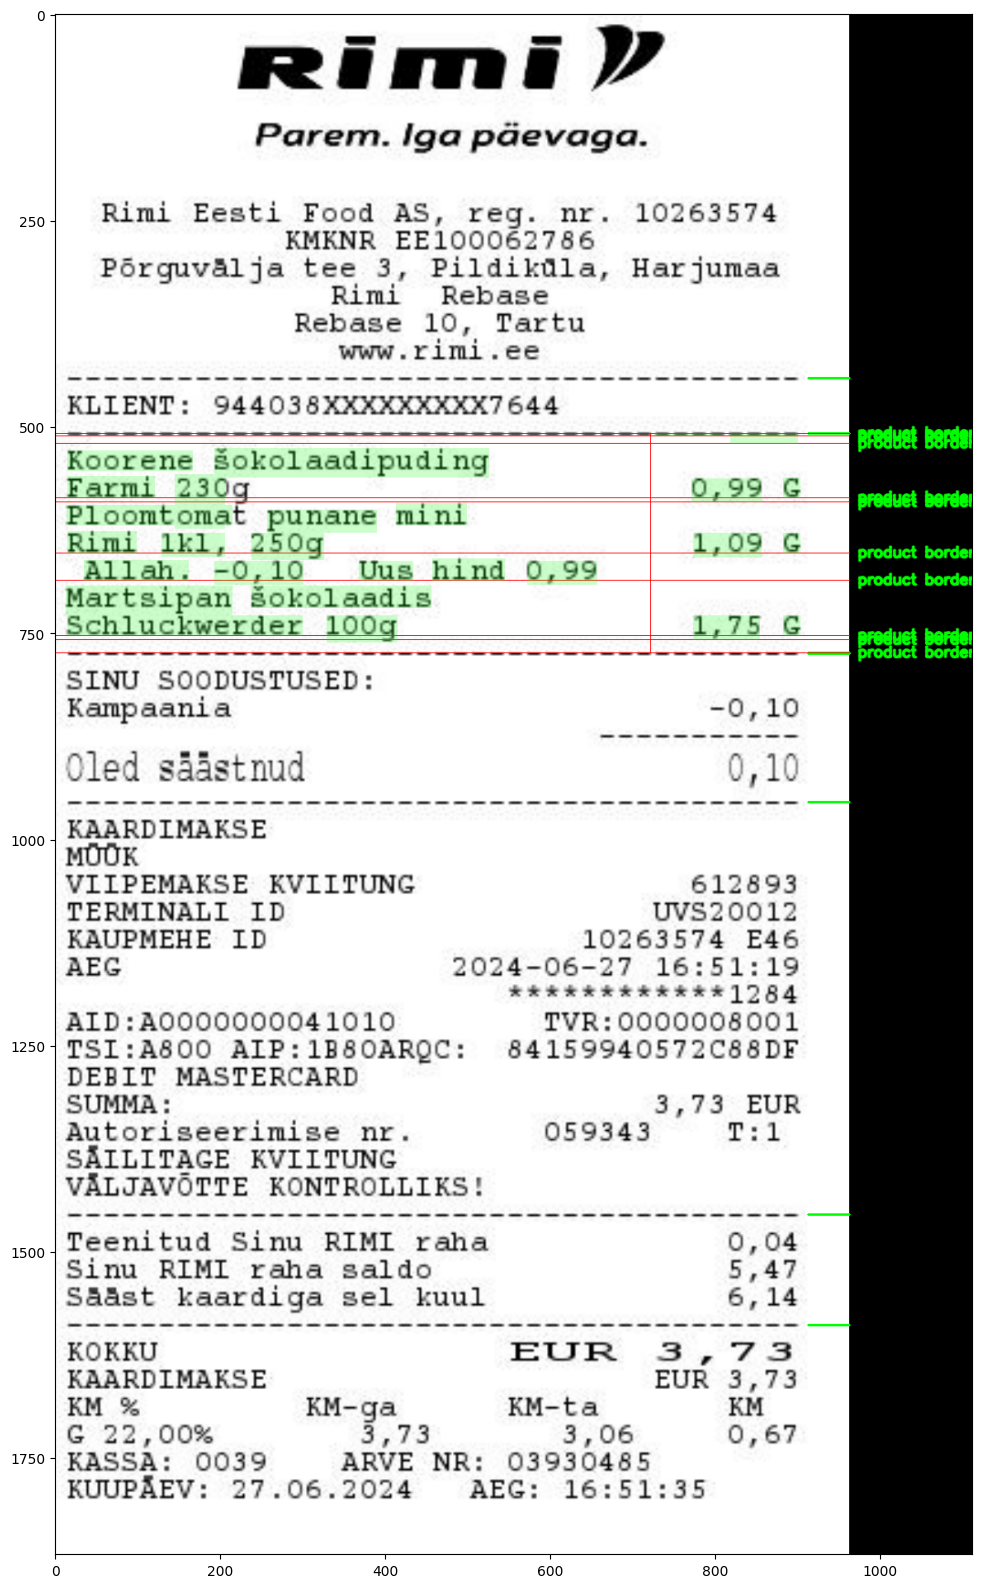

In [50]:
plt.figure(figsize=(20,20))
plt.imshow(parser.vizualize())

### Analysis